👨‍🎓 Integrantes:

Alice C. M. Assis - RM 566233

Leonardo S. Souza - RM 563928

Lucas B. Francelino - RM 561409

Pedro L. T. Silva - RM 561644

Vitor A. Bezerra - RM 563001

GitHub: 

https://github.com/Hinten/fiap_gs1

🔍 Importação de bibliotecas especializadas para análise de dados agrícolas

Nesta célula, são importadas bibliotecas essenciais para análise de dados e pré-processamento e modelagem (sklearn). Essas ferramentas fornecem funcionalidades fundamentais para manipulação de datasets, transformação de variáveis e construção de modelos preditivos eficientes.

In [663]:
# 🔍 Importação de bibliotecas especializadas para análise de dados agrícolas

# ------------------------------
# 📊 Manipulação e Visualização
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# ------------------------------
# 🔄 Pré-processamento
# ------------------------------
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold

# ------------------------------
# 🤖 Modelagem (Classificadores)
# ------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV

# ------------------------------
# 🧪 Avaliação de Desempenho
# ------------------------------
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)

# ------------------------------
# ⚙️ Utilitários
# ------------------------------
import random
import time
import os

📂 Definição do caminho de acesso aos dados da lavoura

Aqui, o caminho do arquivo .csv contendo os dados agrícolas (com as colunas Data, Cota, Chuva e Nivel) é definido em uma variável. Essa prática torna o código mais organizado e permite reutilizar facilmente o caminho do arquivo ao longo do notebook, facilitando ajustes e reaproveitamento do script.

In [664]:
#📂 Definição do caminho de acesso aos dados da lavoura

csv_path = "COTAxCHUVA.csv"

📥 Carregamento do dataset para estrutura tabular do pandas

Esta etapa carrega os dados do arquivo CSV para um DataFrame, que é a estrutura de dados mais comum do pandas. Isso permite a exploração, limpeza e análise dos dados referentes às medições de níveis de água (Cota), chuva e data, além da classificação em níveis de atenção (Nivel).

In [665]:
#📥 Carregamento do dataset para estrutura tabular do pandas

df = pd.read_csv(csv_path)

📈 Estimativa dos níveis críticos de cota para monitoramento

Nesta célula, são calculados os valores dos percentis 90 (P90), 95 (P95) e 98 (P98) da coluna 'Cota'. Esses percentis servem para estabelecer limites de referência para os níveis de atenção, alerta e inundação provável na análise das cotas de água. Os valores calculados ajudam a definir pontos críticos para ações preventivas na gestão da lavoura e monitoramento ambiental. 

In [666]:
#📈 Estimativa dos níveis críticos de cota para monitoramento

# Estimar cotas de atenção, alerta e inundação provável
cota_atencao = df['Cota'].quantile(0.90)
cota_alerta = df['Cota'].quantile(0.95)
cota_inundacao = df['Cota'].quantile(0.98)

print(f"Cota de atenção (P90): {cota_atencao:.2f}")
print(f"Cota de alerta (P95): {cota_alerta:.2f}")
print(f"Cota de inundação provável (P98): {cota_inundacao:.2f}")


Cota de atenção (P90): 200.10
Cota de alerta (P95): 231.00
Cota de inundação provável (P98): 286.16


⚠️ Definição dos limites de risco e classificação do nível de inundação

Nesta etapa, são definidos os valores fixos para os limites dos níveis de atenção, alerta e inundação provável baseados na variável 'Cota'. 

A função `classificar_nivel` recebe o valor da cota e classifica cada registro do DataFrame em uma das categorias de risco:
-*Inundação provável*: cota acima do limite de inundação;
-*Alerta elevado*: cota acima do limite de alerta, mas abaixo da inundação;
-*Situação de atenção*: cota acima do limite de atenção, mas abaixo do alerta;
-*Condições normais*: valores abaixo do limite de atenção.

Por fim, essa classificação é aplicada para criar uma nova coluna chamada 'Nivel' no DataFrame, que será usada como variável alvo para análises e modelos preditivos.

In [667]:
#⚠️ Definição dos limites de risco e classificação do nível de inundação

# Definindo os limites
limite_atencao = 205
limite_alerta = 250
limite_inundacao = 315

# Criar nova coluna 'Nivel'
def classificar_nivel(cota):
    if cota > limite_inundacao:
        return 'Inundação provável'
    elif cota > limite_alerta:
        return 'Alerta elevado'
    elif cota > limite_atencao:
        return 'Situação de atenção'
    else:
        return 'Condições normais'

df['Nivel'] = df['Cota'].apply(classificar_nivel)


🔎 Inspeção inicial do dataset para compreensão de variáveis e formato

Visualizar as primeiras linhas do DataFrame com df.head() serve como um ponto de partida para compreender a estrutura do dataset, verificar nomes de colunas, tipos de variáveis (como Data, Cota, Chuva e Inundacao) e identificar possíveis anomalias logo no início. 

In [668]:
#🔎 Inspeção inicial do dataset para compreensão de variáveis e formato

# 4.1) Exibir primeiras linhas do dataset
df.head(1000)

,Data,Cota,Chuva,Nivel
0,101,122.0,0.0,Condições normais
1,201,121.0,0.0,Condições normais
2,301,121.0,0.0,Condições normais
3,401,120.0,0.0,Condições normais
4,501,121.0,0.4,Condições normais
...,...,...,...,...
553,2712,140.0,0.0,Condições normais
554,2812,137.0,0.0,Condições normais
555,2912,134.0,0.0,Condições normais
556,3012,132.0,0.0,Condições normais


🧾 Diagnóstico estrutural do DataFrame e tipagem dos dados com df.info()

Utiliza-se o método df.info() para obter um resumo técnico da estrutura do dataset. Essa função retorna:

- Número total de entradas (linhas);
- Número e o nome das colunas;
- Número de valores não nulos em cada coluna;
- Tipo de dado de cada coluna (int64, float64, object, etc.);
- Uso aproximado de memória.

Essa análise é essencial para validar se:

Todas as colunas foram corretamente interpretadas pelo pandas (ex: float ao invés de object), se existem colunas com valores ausentes (non-null < total) e se há necessidade de otimizar tipos de dados para uso eficiente de memória, principalmente em grandes volumes de dados. Essa inspeção ajuda a antecipar problemas e tomar decisões sobre pré-processamento antes da análise ou modelagem.

In [669]:
#🧾 Diagnóstico estrutural do DataFrame e tipagem dos dados com df.info() e Complementos úteis (comentados):

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Data    558 non-null    int64  
 1   Cota    550 non-null    float64
 2   Chuva   549 non-null    float64
 3   Nivel   558 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 17.6+ KB


🚨 Detecção de dados faltantes para avaliação da necessidade de imputação

Esta etapa verifica a presença de valores nulos no dataset utilizando df.isnull().sum(). Embora a função df.info() também identifique dados faltantes, sua visualização pode ser menos intuitiva. A existência de valores ausentes pode prejudicar tanto a análise exploratória quanto o desempenho dos modelos preditivos. Por isso, é fundamental decidir uma estratégia adequada, como imputação, exclusão de linhas ou colunas, ou o uso de modelos que suportem dados nulos.

In [670]:
#🚨 Detecção de dados faltantes para avaliar necessidade de imputação

print(df.isnull().sum()) 

Data     0
Cota     8
Chuva    9
Nivel    0
dtype: int64


🔄 Preenchimento de valores faltantes por interpolação pelo valor mais próximo

Nesta etapa, utilizamos o método de interpolação 'nearest' para preencher valores ausentes (NaN) no DataFrame. Esse método substitui os valores faltantes pelo valor válido mais próximo, seja ele anterior ou posterior, preservando a coerência dos dados temporais ou sequenciais. Após o preenchimento, é realizada uma verificação para confirmar se ainda existem valores nulos no dataset, garantindo que a interpolação foi aplicada com sucesso.

In [671]:
#🔄 Preenchimento de valores faltantes por interpolação pelo valor mais próximo

df = df.interpolate(method='nearest')

# Confirmando se ainda ha dados faltantes
print(df.isnull().sum()) 

Data     0
Cota     0
Chuva    0
Nivel    0
dtype: int64


C:\Users\alice\AppData\Local\Temp\ipykernel_16260\2667059381.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method='nearest')


🔁 Detecção de entradas redundantes no dataset

Esta célula tem como objetivo identificar registros duplicados, ou seja, linhas que aparecem mais de uma vez com os mesmos valores em todas as colunas. Isso é feito por meio do método df.duplicated(), que retorna uma série booleana indicando True para as linhas duplicadas.

In [672]:
#🔁 Detecção de entradas redundantes no dataset
duplicates= df.duplicated().sum()
print(f"Total de duplicados: {duplicates}")

Total de duplicados: 1


📊 Detecção e tratamento de valores extremos

Esta célula tem o objetivo de identificar e tratar outliers (valores fora do padrão esperado) nas colunas 'Cota' e 'Chuva', tratar outliers é essencial para evitar distorções em modelos de regressão, classificadores e estatísticas descritivas, especialmente em modelos sensíveis a valores extremos, como KNN e regressão linear.

In [673]:
# 📌 Verificação de valores extremos fora do padrão esperado

# Limites lógicos (ajuste conforme o contexto da sua bacia)
limites_explicitos = {
    'Cota': (50, 500),     
    'Chuva': (0, 300)      
}

for coluna in limites_explicitos:
    limite_inferior, limite_superior = limites_explicitos[coluna]

    extremos = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]

    print(f"\n🔍 Verificando extremos na coluna: {coluna}")
    print(f"Limites esperados: {limite_inferior} a {limite_superior}")
    print(f"Número de valores fora do padrão: {len(extremos)}")

    if not extremos.empty:
        print(extremos[[coluna]].head())



🔍 Verificando extremos na coluna: Cota
Limites esperados: 50 a 500
Número de valores fora do padrão: 0

🔍 Verificando extremos na coluna: Chuva
Limites esperados: 0 a 300
Número de valores fora do padrão: 0


📊 Estatísticas descritivas para análise quantitativa preliminar

Com df.describe(), obtemos medidas estatísticas como média, mediana, desvio padrão e quartis para variáveis numéricas. Isso fornece uma noção do comportamento e da dispersão dos dados, ajudando a identificar outliers e padrões.

In [674]:
#📊 Estatísticas descritivas para análise quantitativa preliminar

df.describe()

,Data,Cota,Chuva
count,558.000000,558.000000,558.000000
mean,1607.500000,146.137993,4.169713
std,895.235836,44.265000,10.969263
min,101.000000,96.000000,0.000000
25%,810.250000,115.000000,0.000000
50%,1608.000000,132.500000,0.000000
75%,2404.750000,165.750000,1.875000
max,3112.000000,386.000000,84.500000


🎯 Quantificação das classes da variável alvo

A função df['Nivel'].value_counts() permite entender quantas amostras existem para cada entrada no dataset.

In [675]:
#🎯 Quantificação das classes da variável alvo

df['Nivel'].value_counts()

Nivel
Condições normais      511
Situação de atenção     27
Alerta elevado          17
Inundação provável       3
Name: count, dtype: int64

🎯 Separando os dados em variáveis preditoras e variável target 

Nesta etapa, fazemos a divisão dos dados em:

X: variáveis preditoras (features), que contêm as informações sobre Chuvas e Cotas. Essas serão as entradas para os modelos.
y: variável target (rótulo), que indica o nível de enchente que queremos prever.

Essa separação é fundamental para o treinamento dos modelos de machine learning, pois permite que eles aprendam a relação entre as condições do ambiente (X) e o nível de enchente (y). Assim, podemos avaliar a capacidade preditiva dos algoritmos para identificar o risco de inundação com base nas condições observadas.

In [676]:
#🎯 Separando os dados em variáveis preditoras e variável target 

X = df.drop(columns=['Nivel'])
y = df['Nivel']

🎯 Conversão da variável alvo categórica para formato numérico

Para que os algoritmos de machine learning possam processar a variável alvo 'Nivel', convertemos as categorias textuais para valores numéricos usando o LabelEncoder. Isso facilita o treinamento dos modelos.

In [677]:
#🎯 Conversão da variável alvo categórica para formato numérico

le = LabelEncoder()
y_enc = le.fit_transform(y)

df['Nivel'] = y_enc

✂️ Separação dos dados em conjuntos de treino e teste com estratificação

Aqui os dados são divididos em conjuntos de treinamento e teste com base em uma proporção definida (80/20). O parâmetro stratify=y garante que a distribuição das classes da variável alvo seja preservada em ambas as amostras, o que é fundamental para garantir avaliações mais realistas e imparciais dos modelos.

In [678]:
#✂️ Separação dos dados em conjuntos de treino e teste com estratificação

y = df['Nivel'] 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

📏 Escalonamento das variáveis numéricas para melhorar desempenho dos modelos

A normalização dos dados, feita com MinMaxScaler, ajusta as variáveis para uma mesma escala (geralmente de 0 a 1). Isso é crucial para algoritmos que são sensíveis à magnitude dos dados, como KNN e SVM, garantindo que nenhuma variável domine a modelagem apenas por ter valores maiores.

In [679]:
#📏 Escalonamento das variáveis numéricas para melhorar desempenho dos modelos

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Garante que y é 1D
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Garante que os valores são inteiros
y_train = y_train.astype(int)
y_test = y_test.astype(int)

🔄 Configurar validação cruzada estratificada com StratifiedKFold 

Aqui, utilizamos o StratifiedKFold para criar 5 divisões (folds) dos dados que preservam a proporção original das classes em cada parte. Configuramos o embaralhamento dos dados (shuffle=True) para garantir aleatoriedade na divisão e definimos uma semente fixa (random_state=42) para resultados reproduzíveis, essa configuração assegura que o modelo seja avaliado de forma equilibrada e consistente em diferentes subconjuntos do conjunto de dados.

In [680]:
#🔄 Configurar validação cruzada estratificada com StratifiedKFold 

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

⚙️ Instanciação de modelos de aprendizado supervisionado para classificação

Nesta célula, criamos uma lista de 20 modelos de machine learning para classificação, com diferentes algoritmos e hiperparâmetros aleatórios. Os modelos incluem Regressão Logística, Árvore de Decisão, Random Forest, Gradient Boosting, SVM, KNN e Naive Bayes.

Para garantir diversidade, cada modelo recebe um nome único baseado em seus hiperparâmetros, evitando duplicatas. Essa variedade permite testar diferentes configurações e comparar seu desempenho na tarefa de prever se haverá ou não inundações.

In [681]:
#⚙️ Instanciação de modelos de aprendizado supervisionado para classificação

# Funções auxiliares para gerar variações aleatórias
random_state = lambda: random.randint(1, 100)
n_estimators = lambda: random.choice([50, 100, 150, 200])
k_neighbors = lambda: random.choice([3, 5, 7, 10, 15])
max_depth = lambda: random.choice([None, 3, 5, 10])
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
hidden_layer_sizes = lambda: random.choice([(50,), (100,), (50, 50), (100, 50)])

modelos = []
nomes_gerados = set()

while len(modelos) < 20:
    modelo_tipo = random.choice([
        'lr', 'dt', 'rf', 'gb', 'svm', 'knn', 'nb',
        'et', 'ada', 'lda', 'qda', 'mlp', 'bag', 'cal'
    ])
    
    if modelo_tipo == 'lr':
        nome = f'LogReg {random_state()}'
        if nome not in nomes_gerados:
            modelo = LogisticRegression(max_iter=1000, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)
    
    elif modelo_tipo == 'dt':
        depth = max_depth()
        nome = f'DecTree d{depth}'
        if nome not in nomes_gerados:
            modelo = DecisionTreeClassifier(max_depth=depth, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)
    
    elif modelo_tipo == 'rf':
        n = n_estimators()
        nome = f'RandForest {n}'
        if nome not in nomes_gerados:
            modelo = RandomForestClassifier(n_estimators=n, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)
    
    elif modelo_tipo == 'gb':
        n = n_estimators()
        nome = f'GradBoost {n}'
        if nome not in nomes_gerados:
            modelo = GradientBoostingClassifier(n_estimators=n, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'et':
        n = n_estimators()
        nome = f'ExtraTrees {n}'
        if nome not in nomes_gerados:
            modelo = ExtraTreesClassifier(n_estimators=n, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'ada':
        n = n_estimators()
        nome = f'AdaBoost {n}'
        if nome not in nomes_gerados:
            modelo = AdaBoostClassifier(n_estimators=n, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)
    
    elif modelo_tipo == 'svm':
        kernel = random.choice(kernels)
        nome = f'SVM {kernel}'
        if nome not in nomes_gerados:
            modelo = SVC(kernel=kernel, probability=True, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'knn':
        k = k_neighbors()
        nome = f'KNN {k}'
        if nome not in nomes_gerados:
            modelo = KNeighborsClassifier(n_neighbors=k)
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'nb':
        nome = f'Naive Bayes {random_state()}'
        if nome not in nomes_gerados:
            modelo = GaussianNB()
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'lda':
        nome = 'LDA'
        if nome not in nomes_gerados:
            modelo = LinearDiscriminantAnalysis()
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'qda':
        nome = 'QDA'
        if nome not in nomes_gerados:
            modelo = QuadraticDiscriminantAnalysis()
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'mlp':
        hls = hidden_layer_sizes()
        nome = f'MLP {hls}'
        if nome not in nomes_gerados:
            modelo = MLPClassifier(hidden_layer_sizes=hls, max_iter=1000, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'bag':
        base_depth = max_depth()
        nome = f'Bagging DT d{base_depth}'
        if nome not in nomes_gerados:
            base_est = DecisionTreeClassifier(max_depth=base_depth, random_state=random_state())
            modelo = BaggingClassifier(estimator=base_est, n_estimators=n_estimators(), random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'cal':
        # CalibratedClassifierCV precisa de base, usar SVM linear
        nome = 'Calibrated SVM linear'
        if nome not in nomes_gerados:
            base_svm = SVC(kernel='linear', probability=False, random_state=random_state())
            modelo = CalibratedClassifierCV(base_svm)
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

📊 Treinamento dos modelos, validação cruzada e avaliação preditiva

Nesta célula, executa-se o ciclo completo de aprendizado de máquina para cada modelo instanciado: 

- ⏱️ *Treinamento* com os dados de treino (`X_train`, `y_train`);
- 🔁 *Predição* e avaliação no conjunto de teste (`X_test`, `y_test`);
- 📈 *Coleta de métricas preditivas* como Acurácia, Precisão, Recall, F1-Score e ROC AUC;
- ⏳ *Registro do tempo de treinamento* de cada modelo;
- 📦 Armazenamento dos modelos treinados e de suas predições para uso posterior.

Essa abordagem permite comparar o desempenho e a eficiência de múltiplos algoritmos sob as mesmas condições experimentais.

In [682]:
#📊 Treinamento dos modelos, validação cruzada e avaliação preditiva


# Avaliação dos modelos
resultados = []
tempos = []
parametros = []
modelos_treinados = {}
y_preds = {}
resultados = []

for nome, modelo in modelos:
    print(f"Treinando: {nome}")
    inicio = time.time()

    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    fim = time.time()
    duracao = fim - inicio

    try:
        y_proba = modelo.predict_proba(X_test)
        if len(set(y)) == 2:
            auc = roc_auc_score(y_test, y_proba[:, 1])
        else:
            auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    except:
        auc = None

    resultados.append({
        'Modelo': nome,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'ROC AUC': auc
    })

    modelos_treinados[nome] = modelo
    y_preds[nome] = y_pred
    tempos.append({'Modelo': nome, 'Tempo Treinamento (s)': round(duracao, 3)})

Treinando: QDA
Treinando: ExtraTrees 100


c:\Users\alice\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


Treinando: GradBoost 150
Treinando: SVM rbf
Treinando: MLP (100,)
Treinando: DecTree d10
Treinando: KNN 7
Treinando: GradBoost 50
Treinando: SVM sigmoid
Treinando: Bagging DT d10
Treinando: DecTree d5
Treinando: MLP (50,)
Treinando: LogReg 75
Treinando: DecTree dNone
Treinando: Naive Bayes 6
Treinando: AdaBoost 50
Treinando: RandForest 150
Treinando: KNN 3
Treinando: GradBoost 200
Treinando: KNN 5


📈 Organização e exibição dos resultados de desempenho dos modelos

Esta célula organiza os resultados obtidos durante a avaliação dos modelos em um DataFrame, ordenando-os pela métrica F1 Score para destacar os modelos com melhor desempenho geral. Além disso, registra o tempo de treinamento de cada modelo em um segundo DataFrame.

In [683]:
#📈 Organização e exibição dos resultados de desempenho dos modelos

atual_resultados = pd.DataFrame(resultados).sort_values(by='F1 Score', ascending=False)
df_resultados = atual_resultados
df_tempos = pd.DataFrame(tempos)

#📋 Comparação visual entre modelos com base em métricas de classificação

Esta célula define e executa a função `exibir_metricas`, responsável por gerar visualizações comparativas entre os modelos de machine learning avaliados. As visualizações incluem:

- *Gráfico de barras do F1 Score*: mostra quais modelos obtiveram melhor desempenho equilibrado entre precisão e recall.
- *Mapa de calor das métricas*: apresenta uma visão geral das principais métricas (Accuracy, Precision, Recall, F1 Score e ROC AUC) para todos os modelos.
- *Gráfico de tempo de treinamento*: compara a eficiência temporal de cada modelo, indicando o tempo necessário para treinar cada um deles.

Essas visualizações ajudam a identificar os modelos mais eficazes e eficientes  para o conjunto de dados hidrológicos analisado.

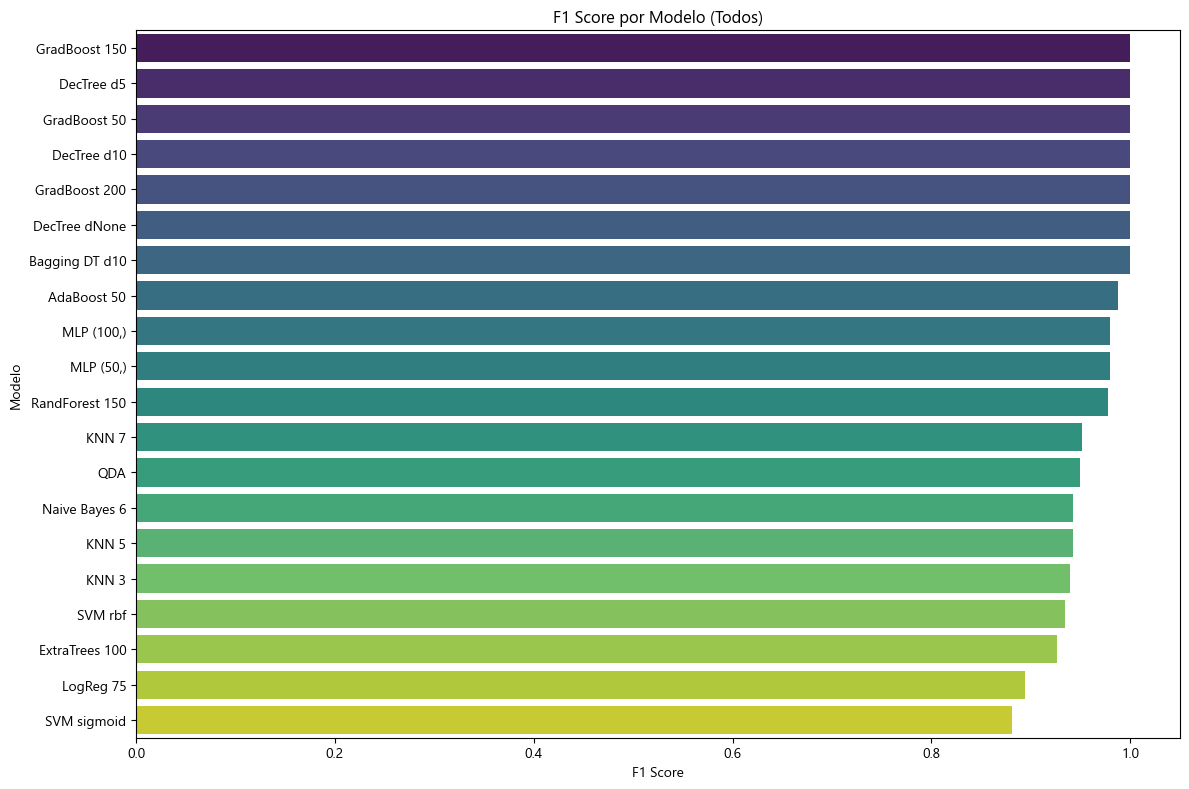

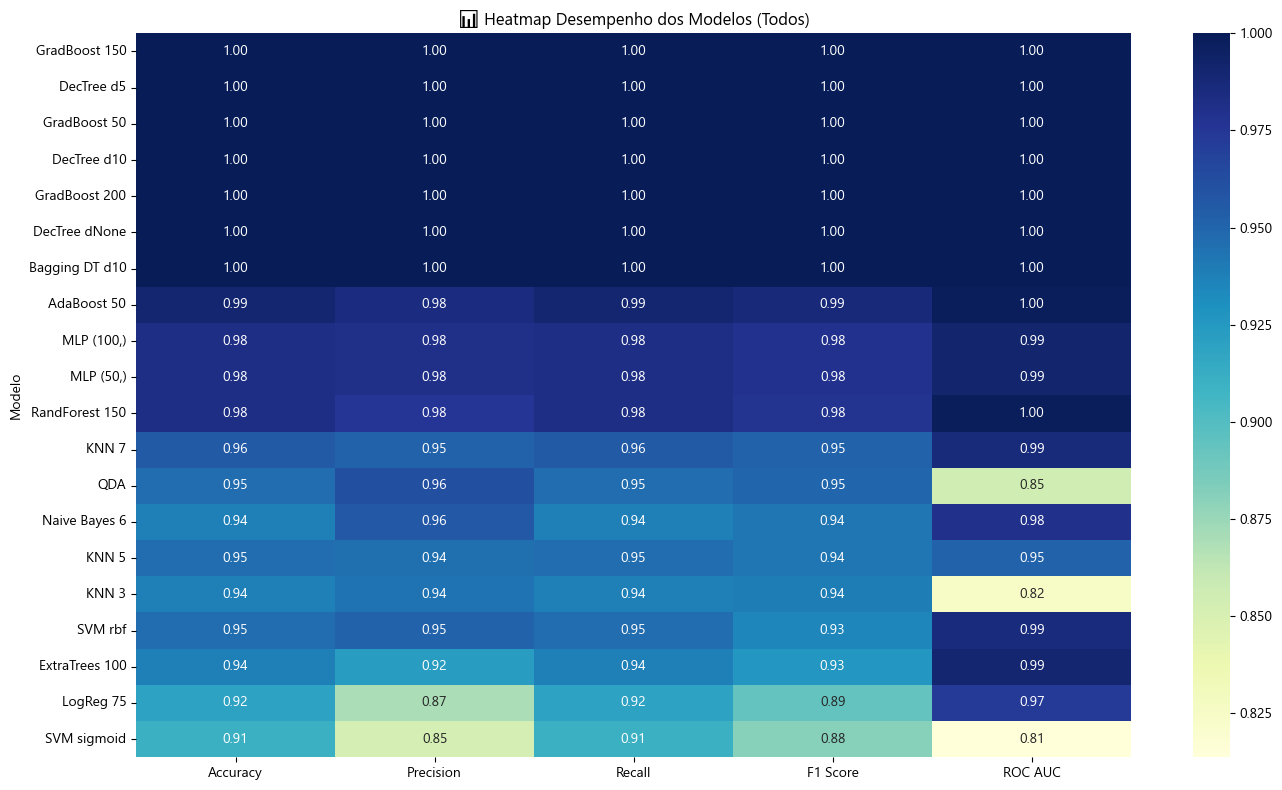

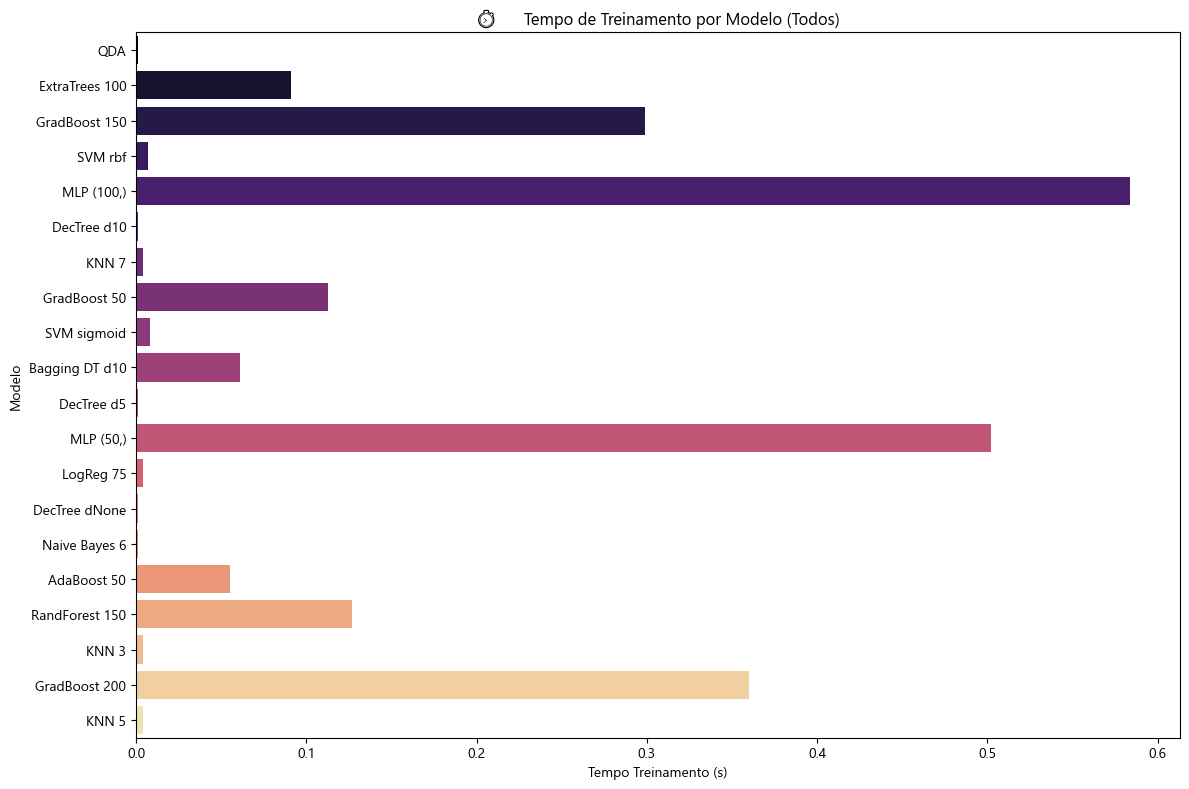

In [684]:
#📋 Comparação visual entre modelos com base em métricas de classificação

def exibir_metricas(df_resultados, df_tempos):
    # Barplot - F1 Score
    plt.figure(figsize=(12, max(6, len(df_resultados) * 0.4)))
    sns.barplot(data=df_resultados, x='F1 Score', y='Modelo', hue='Modelo', palette='viridis', legend=False)
    plt.title('F1 Score por Modelo (Todos)')
    plt.tight_layout()
    plt.show()

    # Heatmap - Todas as métricas
    plt.figure(figsize=(14, max(6, len(df_resultados) * 0.4)))
    heatmap_data = df_resultados.drop(columns='Modelo').set_index(df_resultados['Modelo']).astype(float)
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f')
    plt.title('📊 Heatmap Desempenho dos Modelos (Todos)')
    plt.rcParams['font.family'] = 'Segoe UI Emoji'
    plt.tight_layout()
    plt.show()

    # Tempo de treinamento
    plt.figure(figsize=(12, max(6, len(df_tempos) * 0.4)))
    sns.barplot(data=df_tempos, x='Tempo Treinamento (s)', y='Modelo', hue='Modelo', palette='magma', legend=False)
    plt.title('⏱️ Tempo de Treinamento por Modelo (Todos)')
    plt.rcParams['font.family'] = 'Segoe UI Emoji'
    plt.tight_layout()
    plt.show()

exibir_metricas(df_resultados, df_tempos)

🏆 Verificação e atualização dos 5 melhores modelos

Esta célula mantém um histórico dos 5 modelos com melhor desempenho com base na métrica F1 Score. Se já existir um arquivo melhores_modelos.csv, ele é carregado e combinado com os resultados atuais. A lista combinada é então ordenada, duplicatas são removidas e os 5 melhores modelos únicos são selecionados. Por fim, a nova lista é salva no mesmo arquivo CSV e os dados de tempo de treinamento são cruzados para esses modelos selecionados, preparando os resultados para visualização futura.

In [685]:
# 🏆 Verificação e atualização dos 5 melhores modelos

caminho_csv = 'melhores_modelos.csv'
if os.path.exists(caminho_csv):
    melhores_anteriores = pd.read_csv(caminho_csv)
    combinados = pd.concat([melhores_anteriores, atual_resultados], ignore_index=True)
    combinados = combinados.sort_values(by='F1 Score', ascending=False).drop_duplicates('Modelo').head(5)
else:
    combinados = atual_resultados.head(5)

# Salvar top 5 atualizados
combinados.to_csv(caminho_csv, index=False)

# 3. Cria a pasta para salvar os modelos (se não existir)
os.makedirs("modelos_salvos", exist_ok=True)

# 4. Salva somente os modelos que estão no top 5
modelos_treinados = {}
y_preds = {}
tempos = []

# Cria um set com os nomes dos top 5 para facilitar a verificação
top5_modelos = set(combinados['Modelo'])

for nome, modelo in modelos:
    if nome in top5_modelos:
        nome_arquivo = f"modelos_salvos/{nome.replace(' ', '')}.pkl"
        
        # Salva modelo, scaler e label encoder juntos
        joblib.dump({
            'modelo': modelo,
            'scaler': scaler,
            'label_encoder': le  # <- Aqui está o LabelEncoder
        }, nome_arquivo)
        
        print(f"Modelo, scaler e label encoder salvos em: {nome_arquivo}")

        modelos_treinados[nome] = modelo
        y_preds[nome] = y_pred  # Supondo que y_pred esteja atualizado para esse modelo
        tempos.append({'Modelo': nome, 'Tempo Treinamento (s)': round(duracao, 3)})

# Gerar top 5 resultados e tempos atualizados
top5_resultados = combinados 
top5_tempos = df_tempos.merge(top5_resultados[['Modelo']], on='Modelo')
top5_tempos['Modelo'] = pd.Categorical(top5_tempos['Modelo'], categories=top5_resultados['Modelo'], ordered=True)

Modelo, scaler e label encoder salvos em: modelos_salvos/BaggingDTd10.pkl
Modelo, scaler e label encoder salvos em: modelos_salvos/GradBoost200.pkl


📊 Visualização dos 5 melhores modelos

Esta célula gera gráficos para comparar visualmente o desempenho dos 5 melhores modelos selecionados. São exibidos:

- Um gráfico de barras do F1 Score para os top 5 modelos, facilitando a comparação direta de desempenho.
- Um heatmap com todas as métricas de avaliação para esses modelos, mostrando detalhes de performance de forma clara.
- Um gráfico de barras com o tempo de treinamento de cada modelo, para analisar o custo computacional associado a cada um.

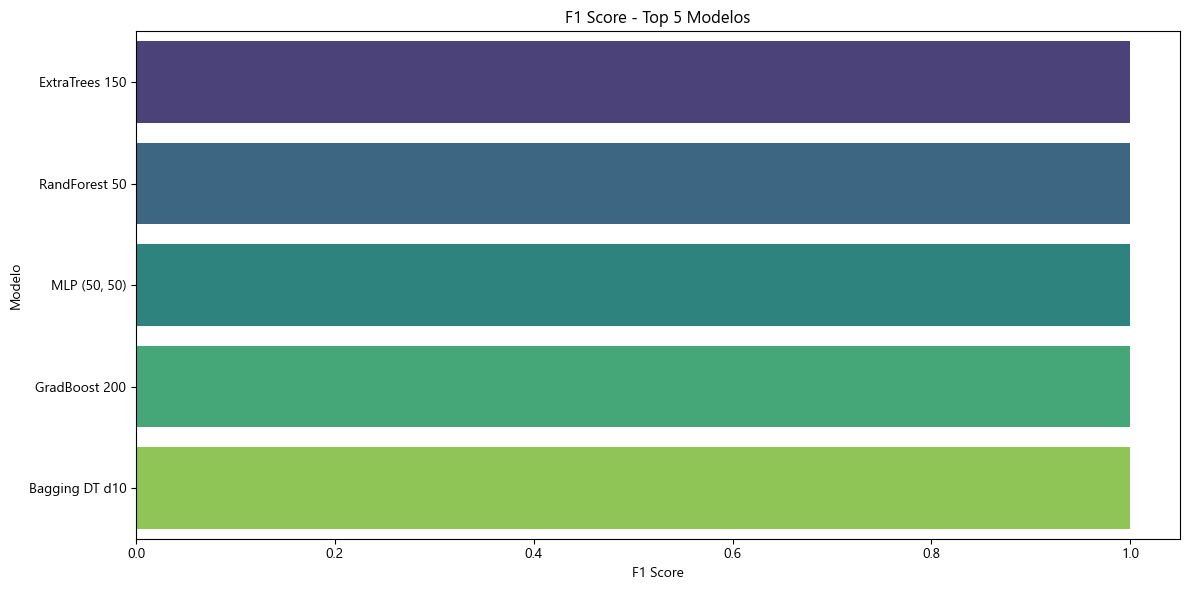

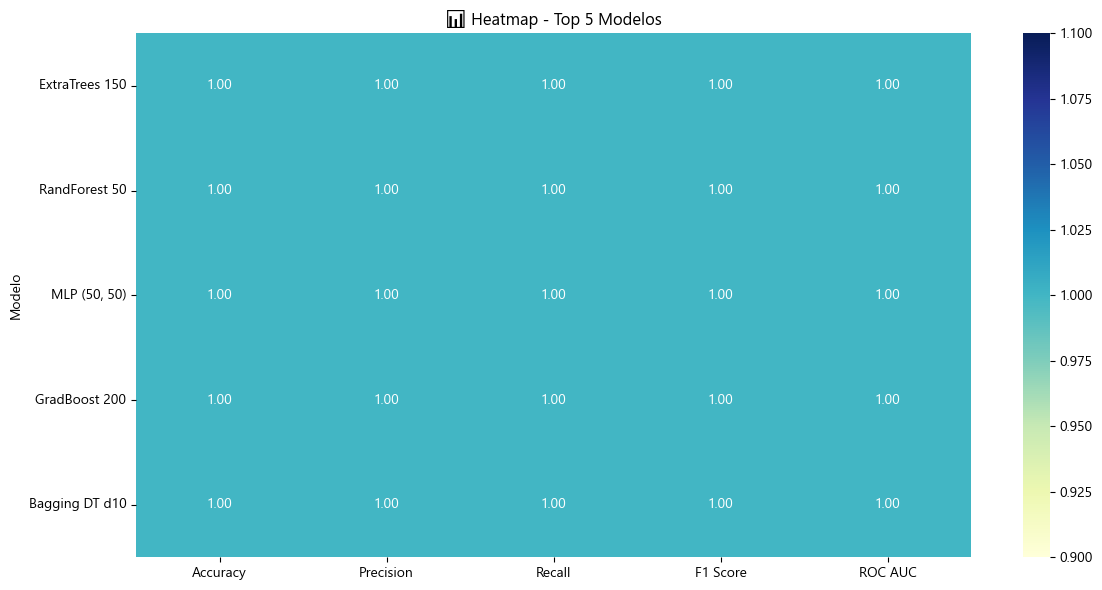

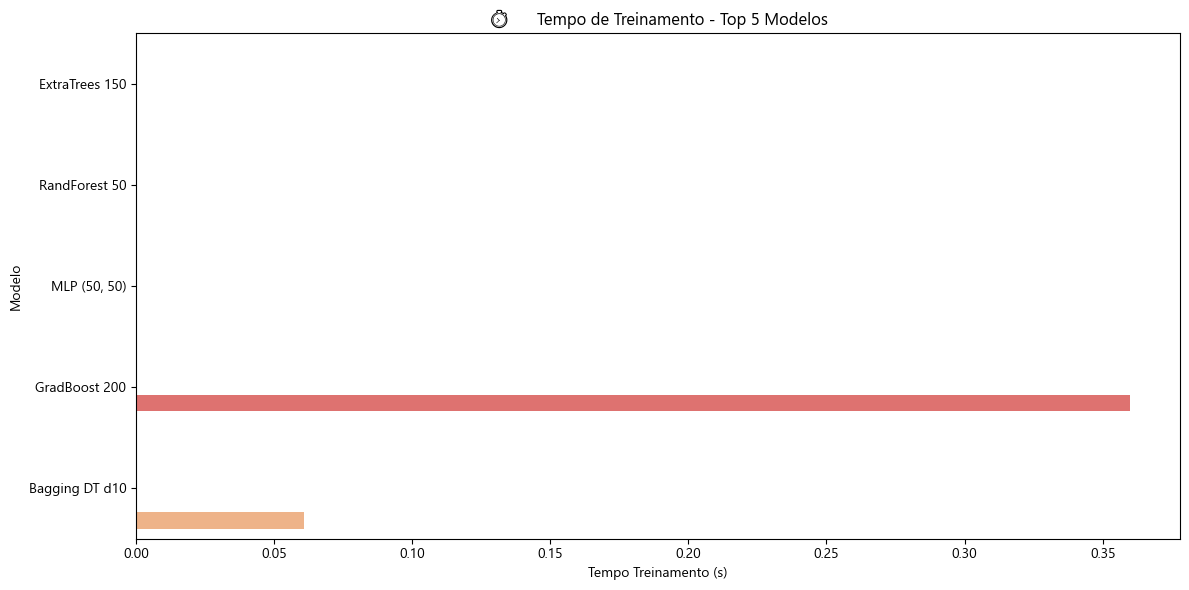

In [686]:
#📊 Visualização dos 5 melhores modelos

# F1 Score dos top 5 modelos
plt.figure(figsize=(12, 6))
sns.barplot(data=top5_resultados, x='F1 Score', y='Modelo', hue='Modelo', palette='viridis', legend=False)
plt.title('F1 Score - Top 5 Modelos')
plt.tight_layout()
plt.show()

# Heatmap dos top 5 modelos
plt.figure(figsize=(12, 6))
sns.heatmap(top5_resultados.drop(columns='Modelo').set_index(top5_resultados['Modelo']).astype(float),annot=True,cmap='YlGnBu',fmt='.2f')
plt.title('📊 Heatmap - Top 5 Modelos')
plt.tight_layout()
plt.show()

# Gráfico de tempo dos top 5 modelos
plt.figure(figsize=(12, 6))
sns.barplot(data=top5_tempos, x='Tempo Treinamento (s)', y='Modelo', hue='Modelo', palette='magma', legend=False)
plt.title('⏱️ Tempo de Treinamento - Top 5 Modelos')
plt.tight_layout()
plt.show()

📑 Apresentação detalhada de métricas preditivas para cada algoritmo

Esta célula imprime, para cada modelo testado:

- A acurácia média da validação cruzada, que fornece uma estimativa mais robusta do desempenho geral, suavizando variações entre divisões dos dados;
- O relatório de classificação (classification_report), que mostra métricas específicas por classe (precisão, recall, f1-score), possibilitando uma avaliação mais granular da performance;
- A matriz de confusão, que evidencia os acertos e erros de classificação por categoria, sendo crucial para entender onde os modelos estão errando.

Essa análise detalhada é essencial para identificar não apenas qual modelo tem melhor desempenho geral, mas também quais estão mais equilibrados entre as classes e quais podem estar cometendo erros sistemáticos.

In [687]:
#📑 Apresentação detalhada de métricas preditivas para cada algoritmo

import numpy as np

#📑 Apresentação detalhada de métricas preditivas para cada algoritmo 
for nome in top5_resultados['Modelo']:
    print(f"\n🔍 Avaliando modelo: {nome}")

    # Tenta obter o modelo: da memória ou do disco
    if nome in modelos_treinados:
        modelo = modelos_treinados[nome]
    else:
        try:
            caminho_modelo = f"modelos_salvos/{nome}.pkl"
            modelo = joblib.load(caminho_modelo)
            print(f"📂 Modelo '{nome}' carregado do disco com sucesso.")
        except FileNotFoundError:
            print(f"❌ Modelo '{nome}' não foi treinado nesta execução e também não foi encontrado em disco.")
            continue  # neste caso, não tem como avaliar

    # Tenta obter as previsões
    if nome in y_preds:
        y_pred = y_preds[nome]
    else:
        y_pred = modelo.predict(X_test)
        y_preds[nome] = y_pred  # salva para reutilização, se necessário
        
    # Se y_test ou y_pred estiverem one-hot encoded, converta para labels originais
    if y_test.ndim > 1 and y_test.shape[1] > 1:
        y_test_labels = ohe.inverse_transform(y_test).ravel()
    else:
        y_test_labels = y_test
    
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred_labels = ohe.inverse_transform(y_pred).ravel()
    else:
        y_pred_labels = y_pred

    # Define as classes presentes nos dados atuais
    labels_presentes = np.unique(np.concatenate([y_test_labels, y_pred_labels]))

    # Avaliação
    acc = accuracy_score(y_test_labels, y_pred_labels)
    prec = precision_score(y_test_labels, y_pred_labels, average='weighted', zero_division=0)
    rec = recall_score(y_test_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

    print(f"✅ Acurácia: {acc:.4f}")
    print(f"✅ Precisão: {prec:.4f}")
    print(f"✅ Revocação: {rec:.4f}")
    print(f"✅ F1-Score: {f1:.4f}")

    # Relatório de classificação
    print("\n📄 Relatório de Classificação:")
    print(classification_report(
        y_test_labels, 
        y_pred_labels,
        labels=labels_presentes,
        target_names=[str(c) for c in labels_presentes],
        zero_division=0
    ))




🔍 Avaliando modelo: ExtraTrees 150
❌ Modelo 'ExtraTrees 150' não foi treinado nesta execução e também não foi encontrado em disco.

🔍 Avaliando modelo: RandForest 50
❌ Modelo 'RandForest 50' não foi treinado nesta execução e também não foi encontrado em disco.

🔍 Avaliando modelo: MLP (50, 50)
❌ Modelo 'MLP (50, 50)' não foi treinado nesta execução e também não foi encontrado em disco.

🔍 Avaliando modelo: GradBoost 200
✅ Acurácia: 0.9464
✅ Precisão: 0.9449
✅ Revocação: 0.9464
✅ F1-Score: 0.9420

📄 Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       0.98      0.98      0.98       103
           2       0.00      0.00      0.00         1
           3       0.67      0.40      0.50         5

    accuracy                           0.95       112
   macro avg       0.54      0.60      0.54       112
weighted avg       0.94      0.95      0.94       112


🔍 Avaliando modelo: Bagging DT 